# Car insurance claim dataset
### Daniel Navarro Quirós
### danielnavarro2911@gmail.com

#### Context

Your client is a car insurance company. They want to price their car insurance competitively, which means having a good model for customers at risk of getting into accidents.

#### Content

Each row corresponds to a customer, the outcome column records whether the customer made a claim in the previous year or not. The client has informed you that the other columns should be self-explanatory.

### Inspiration

The client is interested to know if the customer data can be used to predict the likelihood that a claim is made in the next
year. Your task is to investigate this and make a recommendation. You should complete the following tasks:

* Build a proof-of-concept model to predict the outcome column from the customer data, including any necessary data
processing
* The client is keen to be able to interpret the model you build and would be particularly interested in understanding
which features are most important to the model's decisions.

#### Dataset extracted from [Kaggle](https://www.kaggle.com/racholsan/customer-data?select=customer-data.csv)


## Some imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from matplotlib import colors
cf.go_offline()
%matplotlib inline

In [2]:
df=pd.read_csv('customer-data.csv')

In [3]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [5]:
#Converting True=1 and False=0
for i in df:
    if df[i].dtype=='bool':
        df[i]=(df[i] == True).astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  int32  
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  int32  
 11  children             10000 non-null  int32  
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

# Knowing the customers

In [7]:
plt.style.use('ggplot')

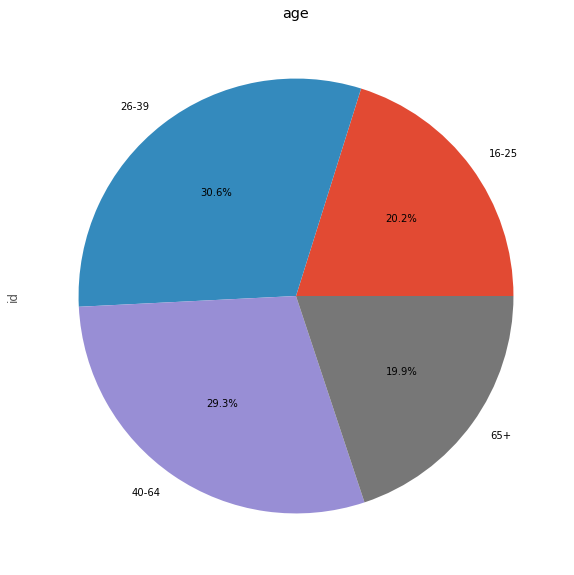

----------------------------------------------------------------------


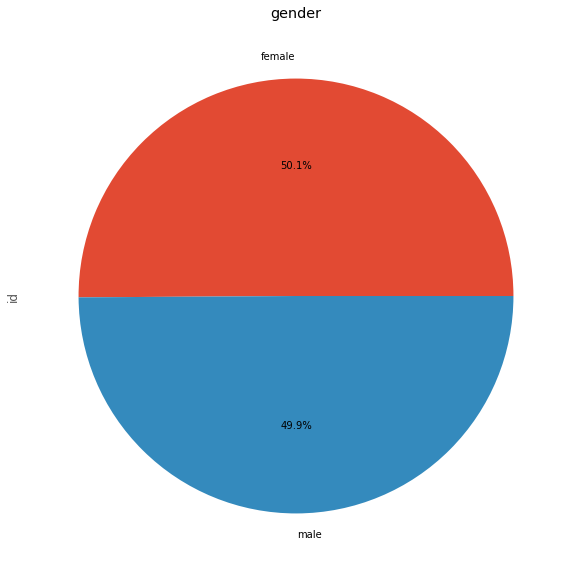

----------------------------------------------------------------------


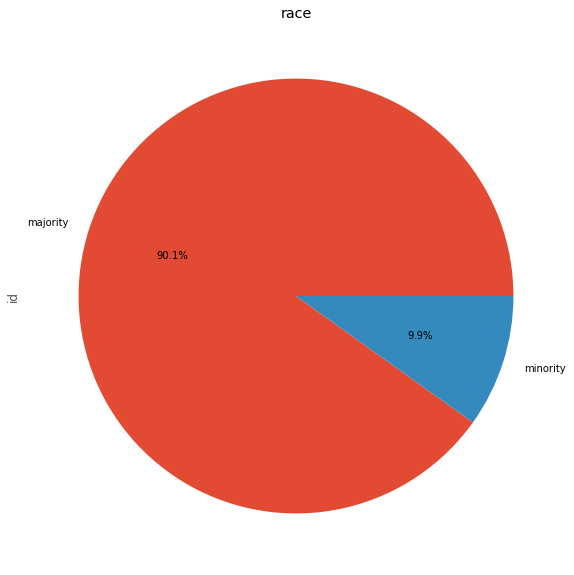

----------------------------------------------------------------------


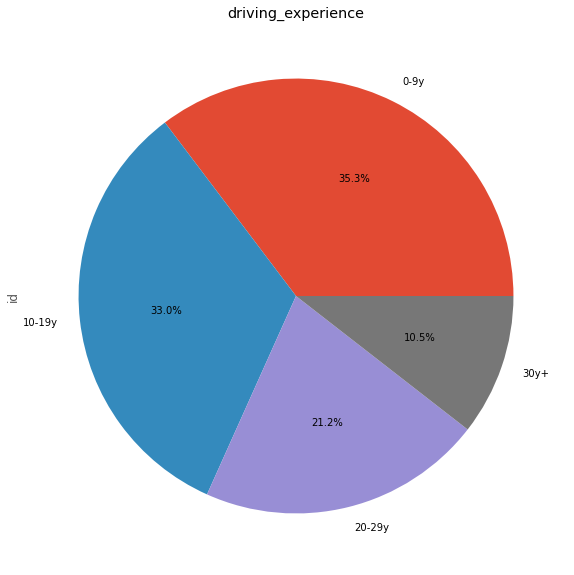

----------------------------------------------------------------------


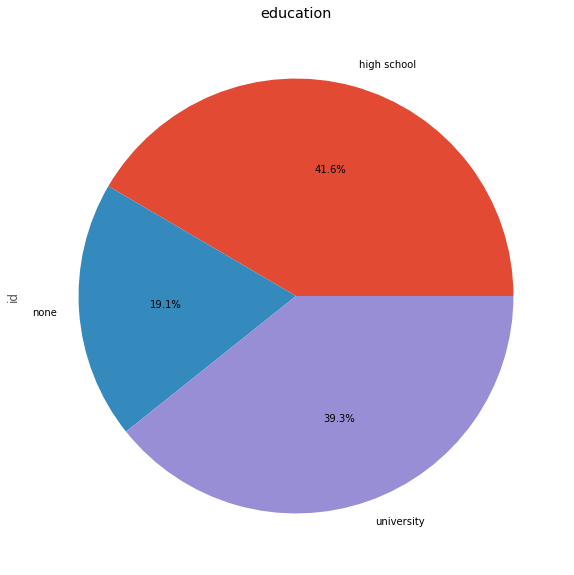

----------------------------------------------------------------------


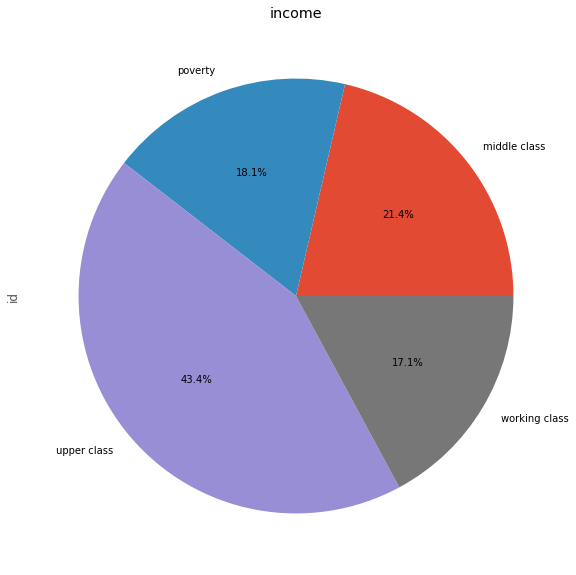

----------------------------------------------------------------------


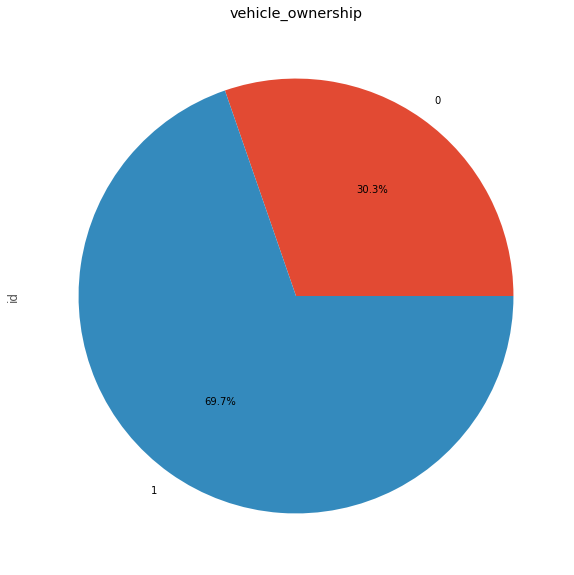

----------------------------------------------------------------------


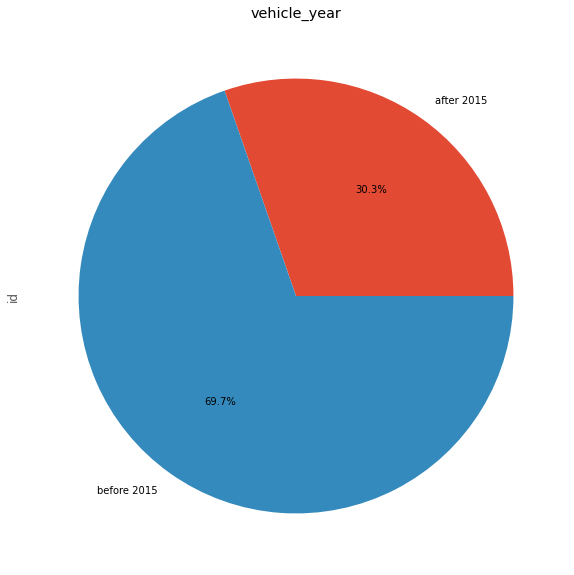

----------------------------------------------------------------------


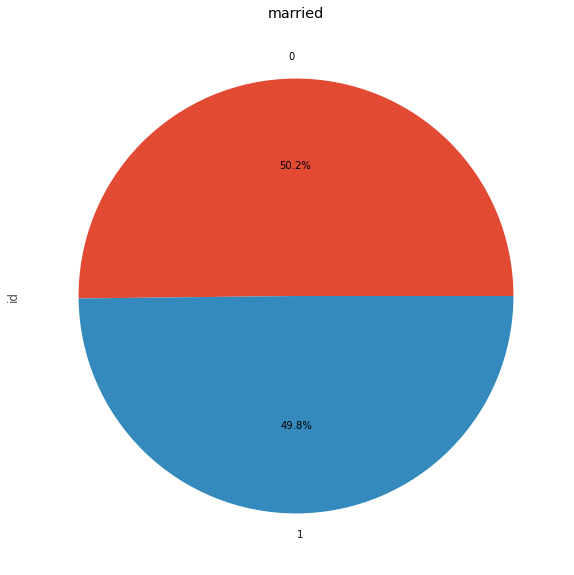

----------------------------------------------------------------------


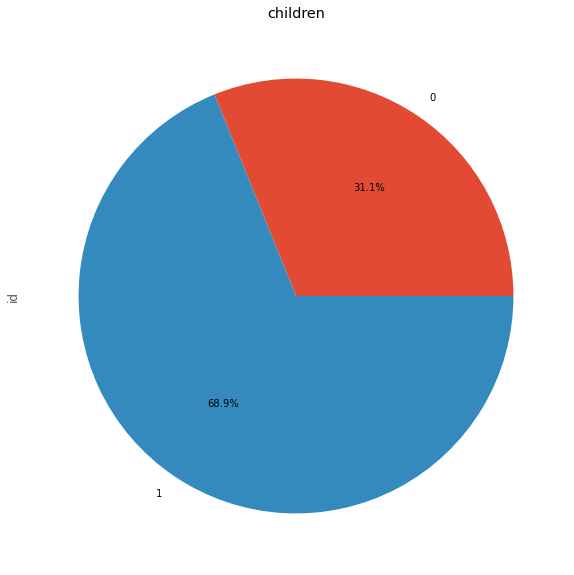

----------------------------------------------------------------------


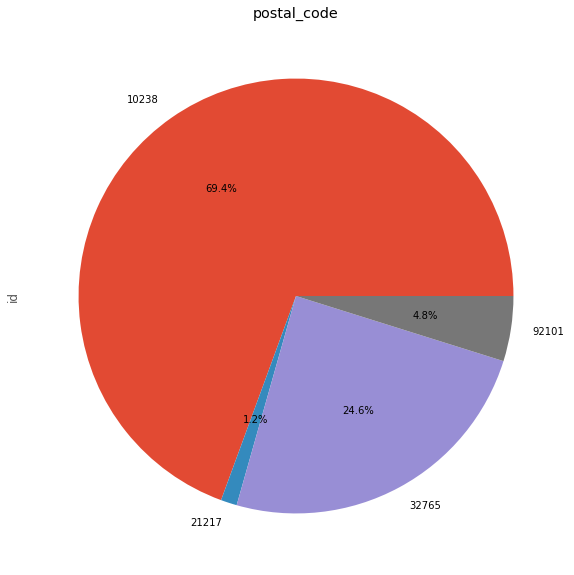

----------------------------------------------------------------------


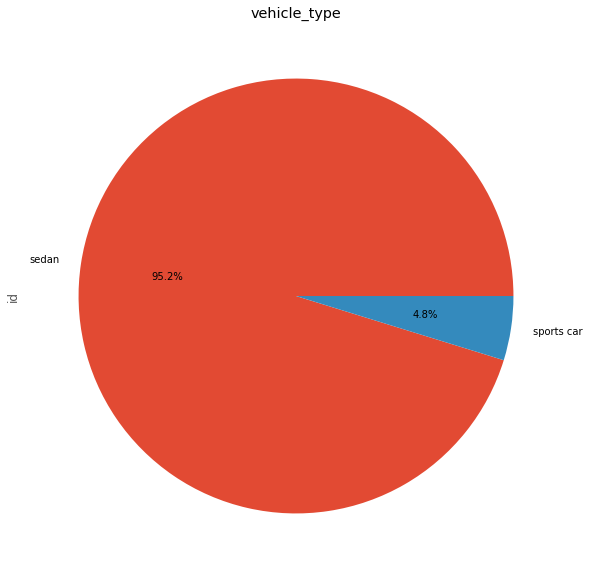

----------------------------------------------------------------------


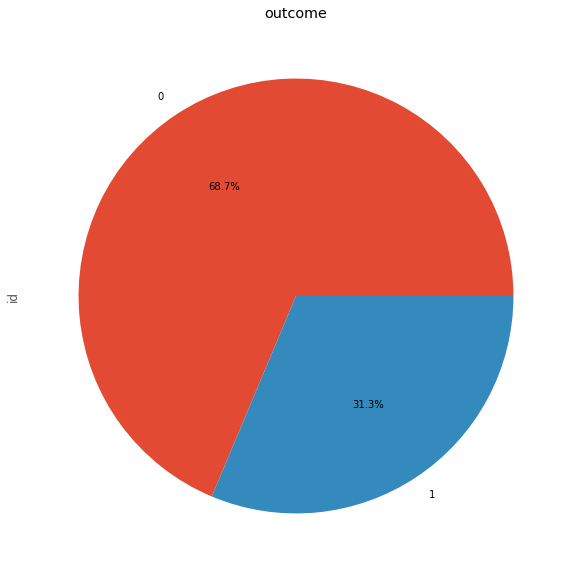

----------------------------------------------------------------------


In [8]:
for i in df:
    if len(df[i].unique())<6:
        plt.figure(figsize=(10,10))
        df.groupby(i).count()['id'].plot.pie(autopct='%1.1f%%')
        plt.title(i)

        plt.show()
        print('----------------------------------------------------------------------')

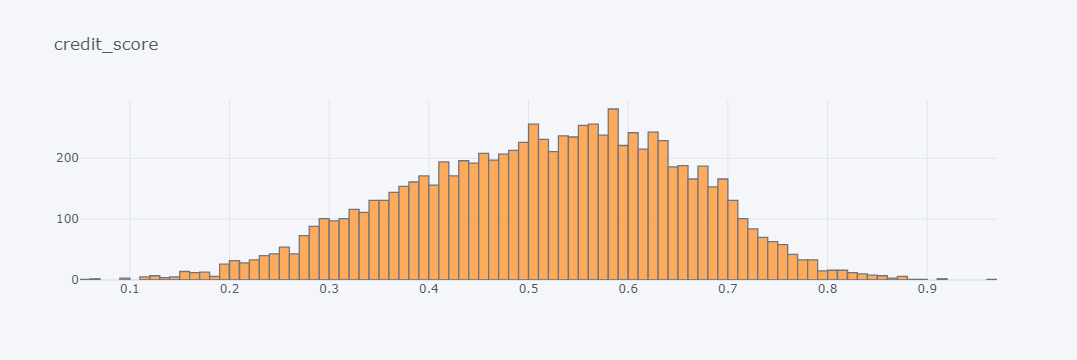

----------------------------------------------------------------------


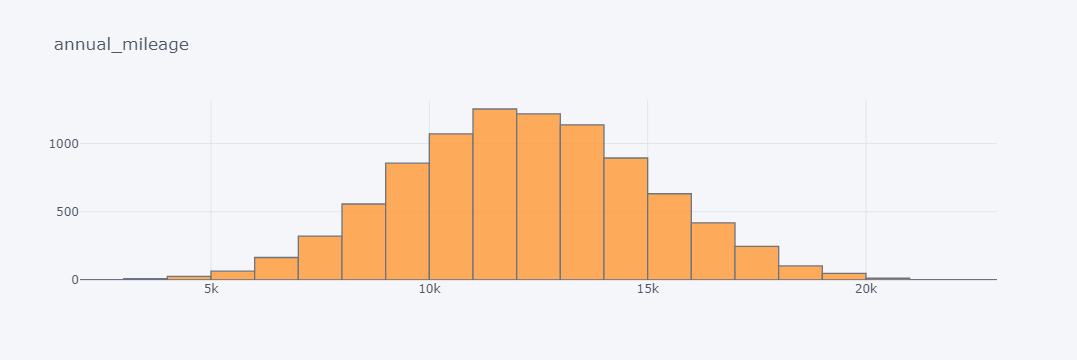

----------------------------------------------------------------------


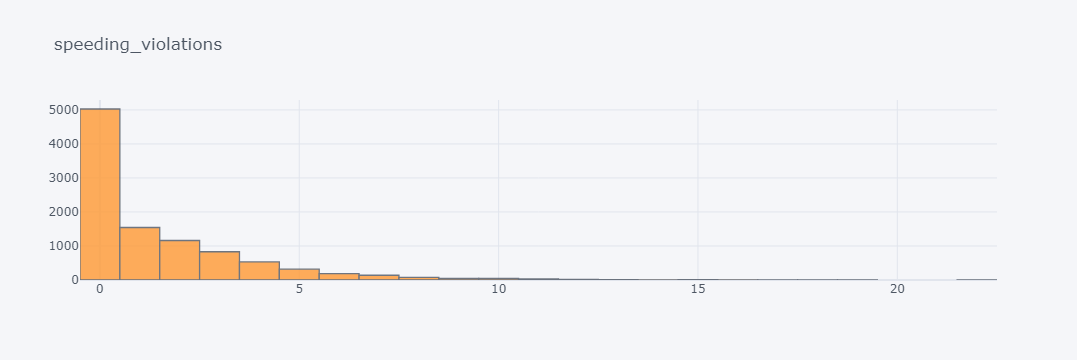

----------------------------------------------------------------------


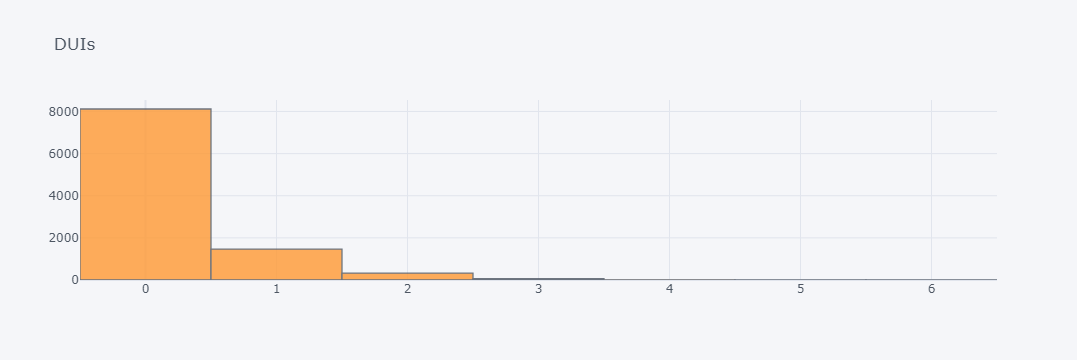

----------------------------------------------------------------------


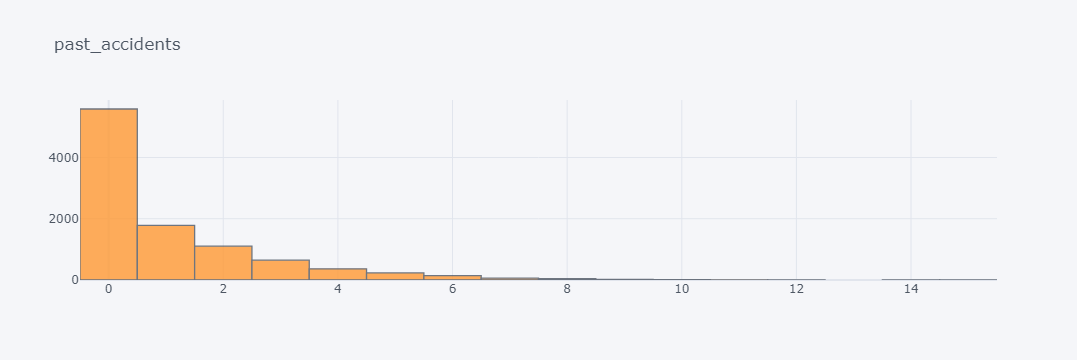

----------------------------------------------------------------------


In [9]:
for i in df.drop('id',axis=1):
    if len(df[i].unique())>6:
        df[i].iplot(kind='hist',title=i)
        print('----------------------------------------------------------------------')

# Some interesting facts

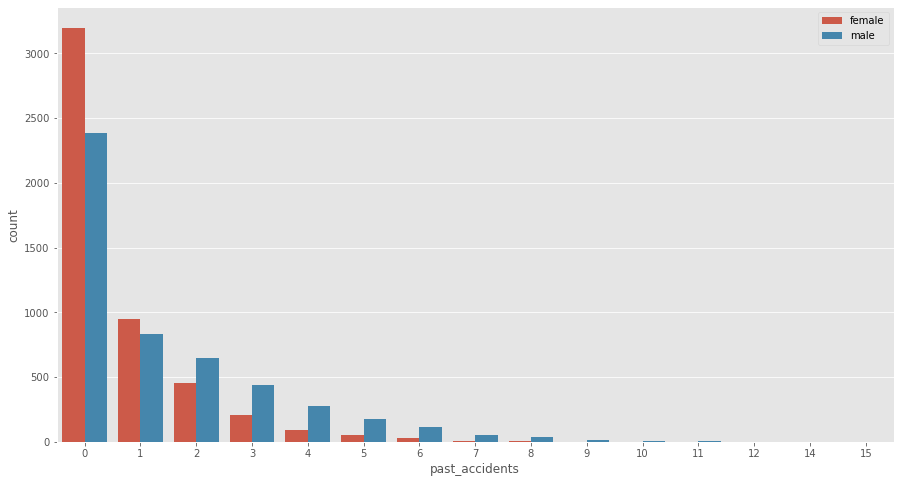

In [10]:
plt.figure(figsize=(15,8))
sns.countplot(x='past_accidents',data=df,hue='gender')
plt.legend(loc=1)

<AxesSubplot:xlabel='age', ylabel='past_accidents'>

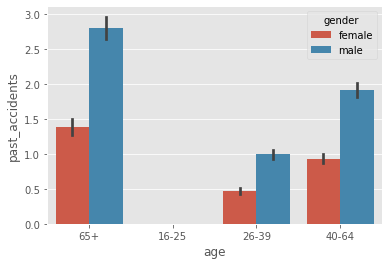

In [11]:
#using mean value
sns.barplot(x='age',y='past_accidents',data=df,hue='gender')

<AxesSubplot:xlabel='gender', ylabel='past_accidents'>

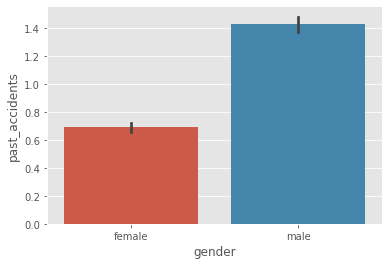

In [12]:
#mean value
sns.barplot(x='gender',y='past_accidents',data=df)

In [13]:
df.head(1)

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0


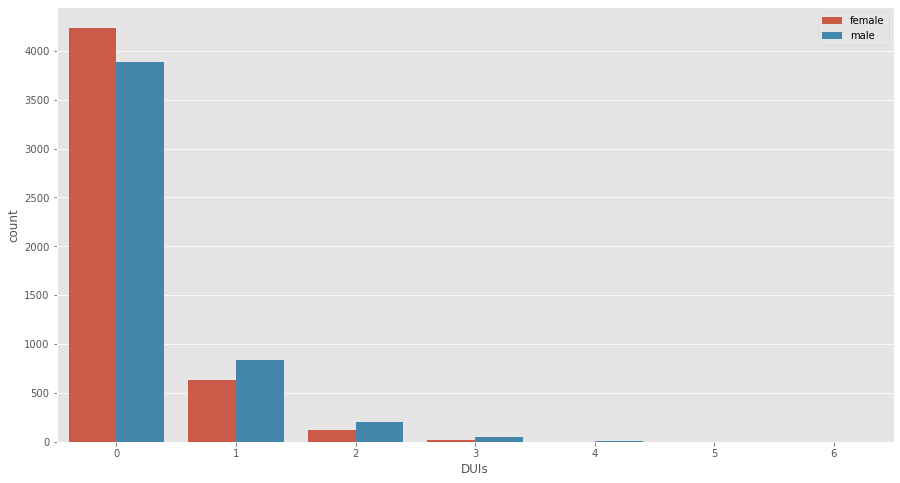

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='DUIs',data=df,hue='gender')
plt.legend(loc=1)

<AxesSubplot:xlabel='gender', ylabel='DUIs'>

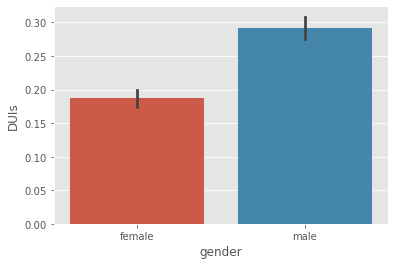

In [15]:
#mean value
sns.barplot(x='gender',y='DUIs',data=df)

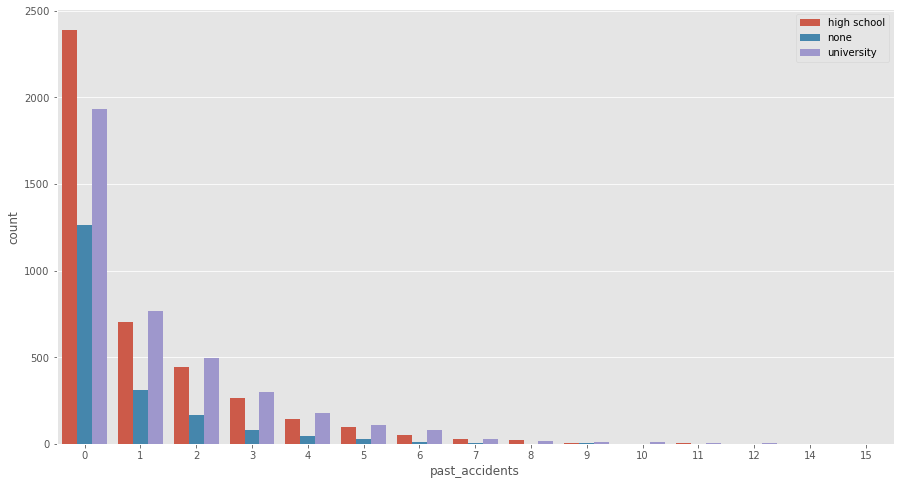

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='past_accidents',data=df,hue='education')
plt.legend(loc=1)

<AxesSubplot:xlabel='education', ylabel='past_accidents'>

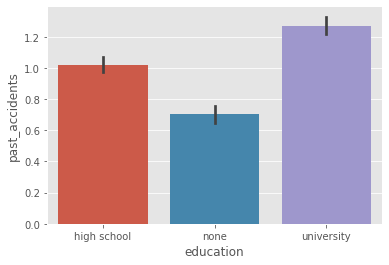

In [17]:
sns.barplot(x='education',y='past_accidents',data=df)

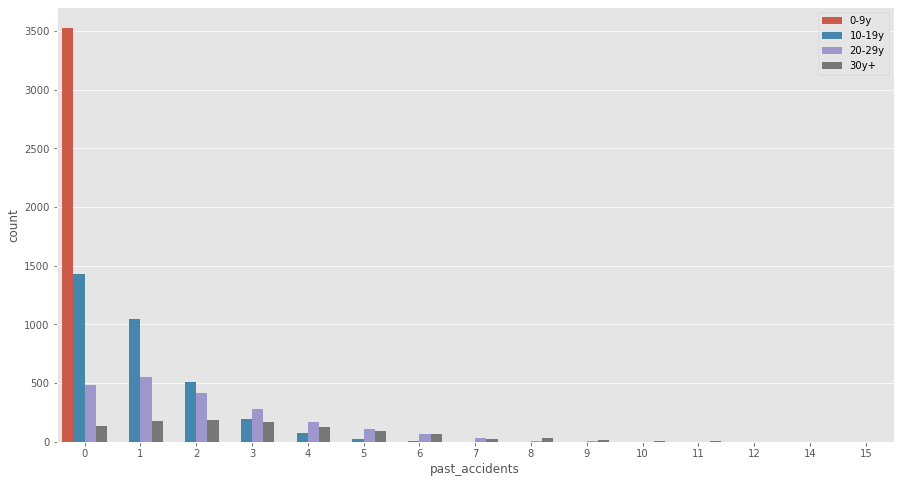

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='past_accidents',data=df,hue='driving_experience')
plt.legend(loc=1)

<AxesSubplot:xlabel='driving_experience', ylabel='past_accidents'>

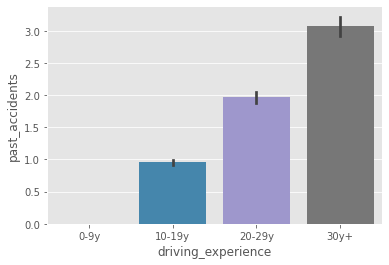

In [19]:
sns.barplot(x='driving_experience',y='past_accidents',data=df)

# Missing data

Text(0.5, 1.0, 'Missing Data')

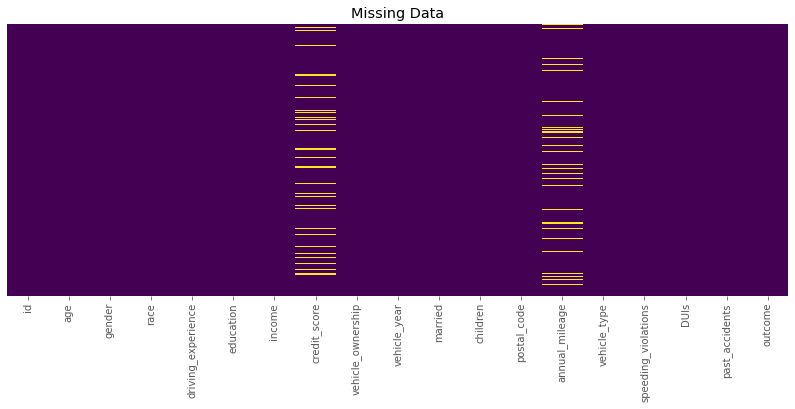

In [20]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

We have missing data in credit score and annual mileage, I am going to fill the credit score using the mean value of it, grouping by the income feature, and drop the annual mileage missing data


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  int32  
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  int32  
 11  children             10000 non-null  int32  
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

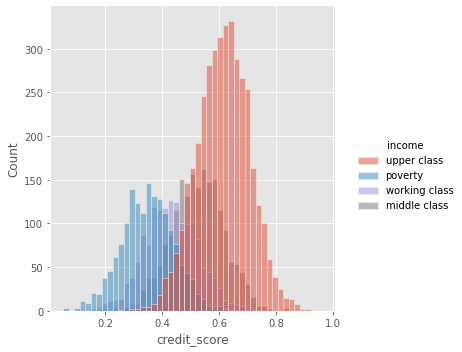

In [22]:
sns.displot(x='credit_score',data=df,hue='income')
#We can see, each income class has different credit score distribution

In [23]:
df.groupby('income')['credit_score'].describe()['mean'].reset_index()
#Here, we have the credit score mean value, grouping by the income class

,income,mean
0,middle class,0.523659
1,poverty,0.348331
2,upper class,0.613827
3,working class,0.431929


In [24]:
#filling in the missing data
def missing_score(x):
    score = x[0]
    income = x[1]
    
    if pd.isnull(score):

        if income=='middle class':
            return 0.523659

        elif income=='poverty':
            return 0.348331

        elif income=='upper class':
            return 0.613827
        else:
            return 0.431929

    else:
        return score

In [25]:
df['credit_score']=df[['credit_score','income']].apply(missing_score,axis=1)

<AxesSubplot:>

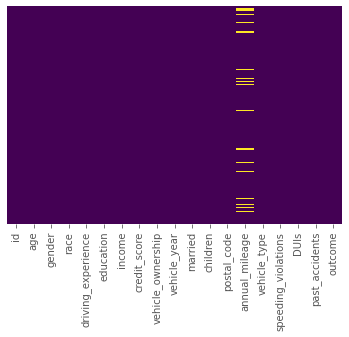

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, dropping the annual mileage and unimportant features

In [27]:
df.drop(['id','race','postal_code','annual_mileage'],axis=1,inplace=True)

In [28]:
df

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,0-9y,high school,upper class,0.629027,1,after 2015,0,1,sedan,0,0,0,0
1,16-25,male,0-9y,none,poverty,0.357757,0,before 2015,0,0,sedan,0,0,0,1
2,16-25,female,0-9y,high school,working class,0.493146,1,before 2015,0,0,sedan,0,0,0,0
3,16-25,male,0-9y,university,working class,0.206013,1,before 2015,0,1,sedan,0,0,0,0
4,26-39,male,10-19y,none,working class,0.388366,1,before 2015,0,0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,10-19y,university,upper class,0.582787,1,before 2015,0,0,sedan,0,0,1,0
9996,26-39,female,10-19y,none,middle class,0.522231,1,after 2015,0,1,sedan,1,0,0,0
9997,26-39,male,0-9y,high school,middle class,0.470940,1,before 2015,0,1,sedan,0,0,0,0
9998,26-39,female,10-19y,high school,poverty,0.364185,0,before 2015,0,1,sedan,2,0,1,1


# Looking for relations with the Outcome feature

First, I am going to convert all the features to numbers

In [29]:
for i in df:
    if df[i].dtype=='O':
        var=pd.get_dummies(df[i],drop_first=False)
        df.drop(i,axis=1,inplace=True)
        df=pd.concat([df,var],axis=1)

In [30]:
df.head()

,credit_score,vehicle_ownership,married,children,speeding_violations,DUIs,past_accidents,outcome,16-25,26-39,...,none,university,middle class,poverty,upper class,working class,after 2015,before 2015,sedan,sports car
0,0.629027,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0.357757,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,1,1,0
2,0.493146,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,0.206013,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,1,0,0,2,0,1,1,0,1,...,1,0,0,0,0,1,0,1,1,0


<AxesSubplot:>

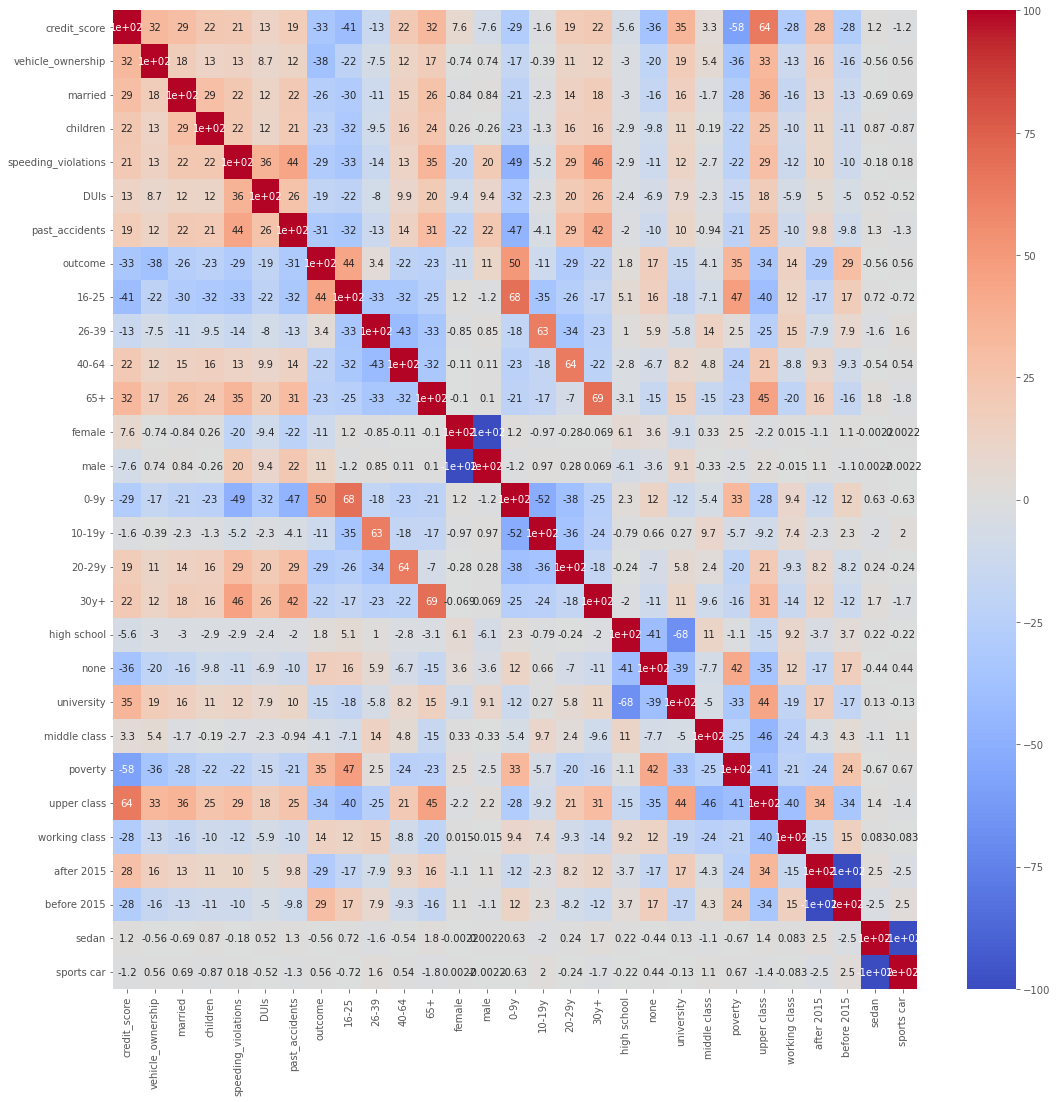

In [31]:
#correlations between all the features
plt.figure(figsize=(18,18))
sns.heatmap(data=df._get_numeric_data().corr()*100,annot=True,cmap='coolwarm')

<AxesSubplot:title={'center':'Correlations between Outcome and all the features'}>

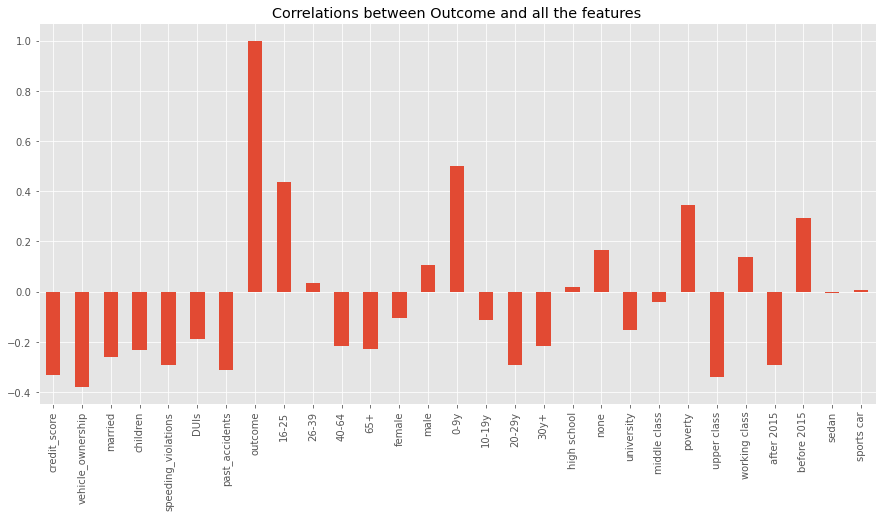

In [32]:
plt.figure(figsize=(15,7))
plt.title('Correlations between Outcome and all the features')
df.corr()['outcome'].plot.bar()

# Recommendations
* Create strong limits with DUIS and Past accidents
* If the target is an Outcome False, focus in: Age, Driving Experience, Education, Incomes, Credit Score, Vehicle Year, Vehicle Ownership, Married
* Create a Machine Learning algorithm to predict future Outcomes



# Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=df.drop('outcome',axis=1)
y=df['outcome']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2026
           1       0.76      0.70      0.73       974

    accuracy                           0.83      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.83      0.83      0.83      3000



In [41]:
print(confusion_matrix(y_test,predictions))

[[1809  217]
 [ 289  685]]
